# Purpose
In this notebook I will implement a simple single-layer ADALINE "by hand" and apply it to a couple datasets: one for binary classification and another for simple regression

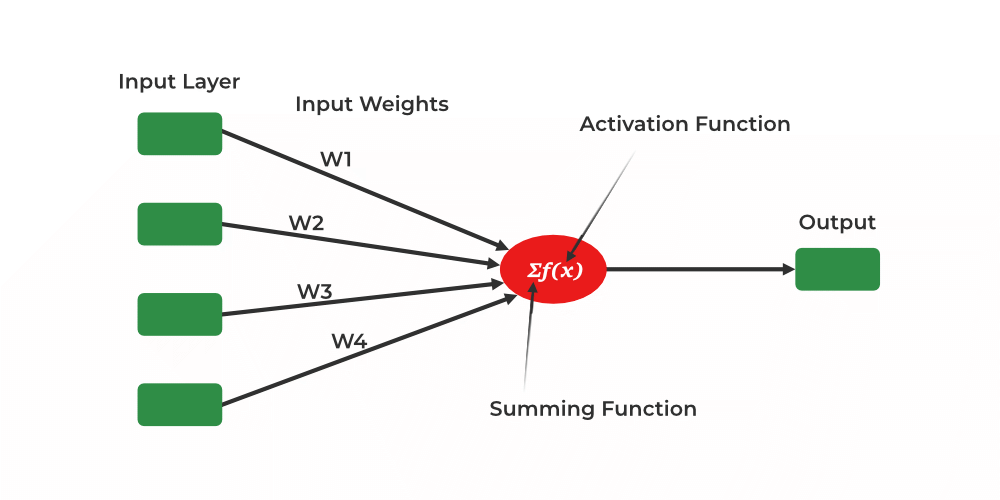

In [2]:
from PIL import Image

Image.open("../resources/Single-Layer-Perceptron.png")

# Import packages

In [3]:
import sys

# append the path of the parent directory
sys.path.append("..")

# Data
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# My functions
from perceptrons import single_layer

# Make/load data

In [4]:
X_classification, y_classification = make_classification(
    n_samples=100, n_features=5, n_informative=3, n_classes=2, random_state=1
)

In [5]:
X_regression, y_regression = make_regression(
    n_samples=100, n_features=5, n_informative=3, noise=0.1, random_state=1
)

# Single layer ADALINE

# Hard, multi-feature data

In [7]:
adaline = single_layer.Adaline(epochs=100, eta=0.1)

adaline.fit(X=X_classification, y=y_classification)
print('Weights: %s' % adaline.w_)

Weights: [-0.95353252  0.87478533 -0.30266698 -1.89623389 -1.26305475  0.08830246]


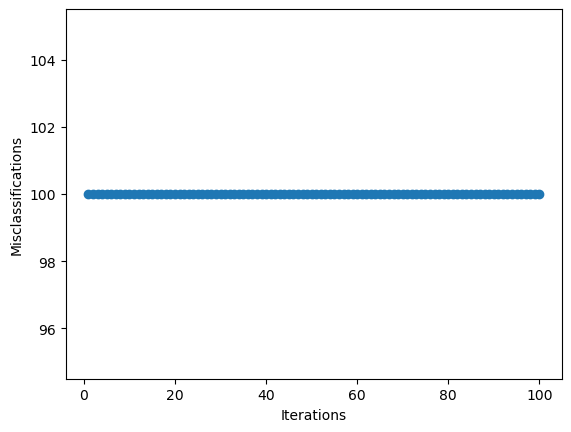

In [8]:
plt.plot(range(1, len(adaline.errors_)+1), adaline.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

## Check a 2-feature data set that is easier to separate samples 

In [12]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

<Axes: xlabel='0', ylabel='1'>

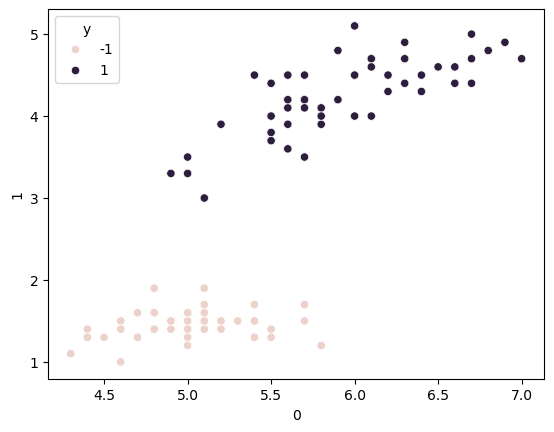

In [13]:
data = pd.DataFrame(X, columns=["0", "1"])
data["y"] = y

sns.scatterplot(data=data, x="0", y="1", hue="y")

Weights: [-31.32907408 -90.18848706 143.77850785]


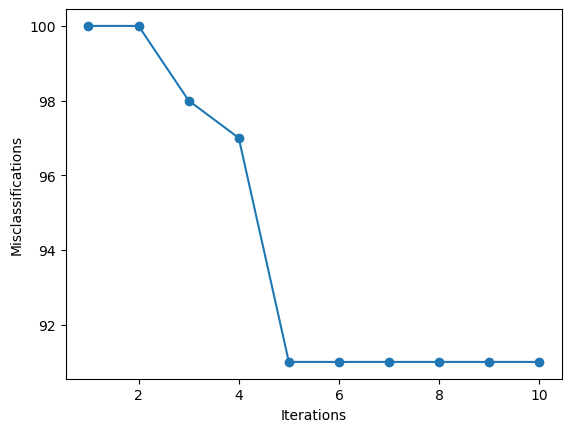

In [14]:
ppn = single_layer.Adaline(epochs=10, eta=0.2)

ppn.fit(X, y)
print('Weights: %s' % ppn.w_)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


- When it's easier to split samples, the perceptron simple update method works well. Otherwise, we need to find a better method